# Marketing_Data Analysis

firstly import libraries whic I used throughtout this  project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

now extract our Dataset whic we used to analyes

In [2]:
market=pd.read_csv("C:\\Users\\lenovo\\Downloads\\CSV\\marketing_data.csv",encoding="utf-8")

 now we read the data set ,
and our problem is Manager is not happy  with sales , he want more sales and he provide data too analyes data and give insights to imporve sales 

In [3]:
market.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


let's cheq our dataset columns type and  wheter null values are in  our data set or not

In [4]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

# Data Cleaning
so now we now that this data set have some values whic are null and the main columns whic contains income of customers are object type and we want to convert the income column in flot type because values are in decimal tyep , so let's clean the Data

now extract more information useing describe functions

In [5]:
market.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


now I cheq Data set's columns and Income columns name have space on both side so just remove the space on its name

In [6]:
market.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [7]:
cc=['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country']

In our columns name's first letter are capital so just copy the names of columns and excute for loop to convert all of them to lover case 

In [8]:
columns=[]
for i in cc:
    i=i.lower()
    columns.append(i)

now  our lover case columns name are apply to our Data set columns name 

In [9]:
market.columns=columns

In [10]:
market.shape

(2240, 28)

there are 24 values whic are null and all of them are only in Income column

In [11]:
market.isnull().sum()

id                      0
year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
response                0
complain                0
country                 0
dtype: int64

now its time to change the datatype of income to flot and it contains $ sign so I just replace it whit nothing 

In [12]:
market['income']=market['income'].replace("[\$,]",'',regex=True).astype(float)

now try to know about income columns in more depth

In [13]:
market.income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: income, dtype: float64

# Data Analysis 
now we see that our income columns have outliers so now I have to remove this outliers for more analysis

<AxesSubplot:ylabel='income'>

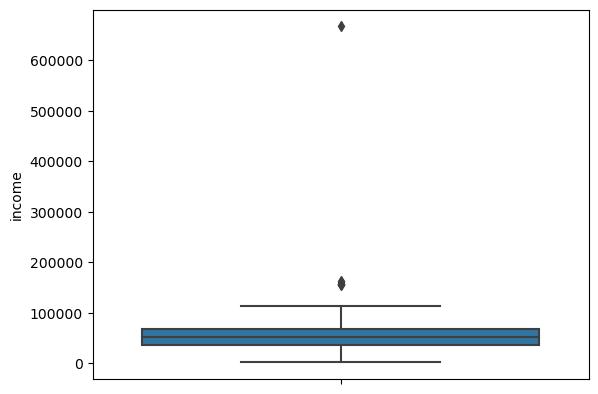

In [14]:
sns.boxplot(y="income",data=market)

In [15]:
market=market[market['income']<300000]

In [16]:
market.sort_values(by="income",ascending=False)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country
731,1503,1976,PhD,Together,162397.0,1,1,6/3/13,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,0,SP
497,1501,1982,PhD,Married,160803.0,0,0,8/4/12,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,0,US
853,5336,1971,Master,Together,157733.0,1,0,6/4/13,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,0,SP
2204,8475,1973,PhD,Married,157243.0,0,1,3/1/14,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,0,IND
325,4931,1977,Graduation,Together,157146.0,0,0,4/29/13,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,0,SA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,10311,1969,Graduation,Married,4428.0,0,1,10/5/13,0,16,4,12,2,4,321,0,25,0,0,1,0,0,0,0,0,0,0,SP
663,9931,1963,PhD,Married,4023.0,1,1,6/23/14,29,5,0,1,1,1,1,15,0,0,0,19,0,0,0,0,0,0,0,SP
1291,11110,1973,Graduation,Single,3502.0,1,0,4/13/13,56,2,1,1,0,0,1,0,0,0,0,14,0,0,0,0,0,0,0,IND
961,5376,1979,Graduation,Married,2447.0,1,0,1/6/13,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,0,0,0,0,0,US


this is better box plot compare to last one because now  we have only ourliers but its very small compare to last one

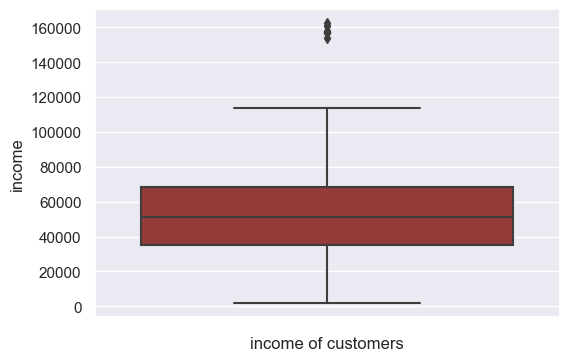

In [17]:
sns.set(rc={"figure.figsize":(6,4)})
sns.boxplot(y=market['income'],color="brown")
plt.xlabel("income of customers")
plt.show()

now fill those columns values whic are null with average of income 

In [18]:
market['income']=market.income.fillna(market.income.mean())

In [19]:
market.income.isnull().sum()

0

this is the secound type to remove outliers with upper limit of income columns

In [20]:
q1,q3=market.income.quantile([.25,.75])

In [21]:
iqr=q3-q1

In [22]:
upper_limit=q3+1.5*(iqr)

In [23]:
income=market

here we convert those outliers whic are high in front of upeer limit with upper limit

In [24]:
income.income=np.where(market.income>upper_limit,upper_limit,market.income)

In [25]:
income.income.describe()

count      2215.000000
mean      51844.295034
std       21016.454130
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      118291.500000
Name: income, dtype: float64

now see our boxplot have no outliers

<AxesSubplot:ylabel='income'>

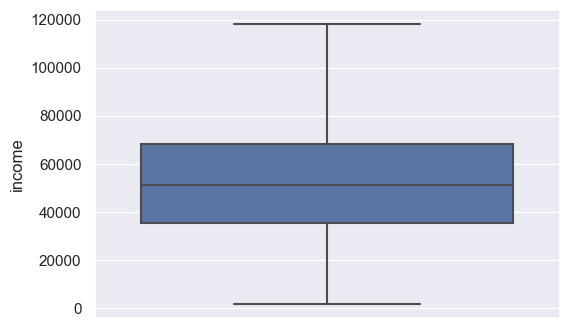

In [26]:
sns.boxplot(y=income["income"])

here I create columns age who have age of customers

In [27]:
market['age']=2020-market.year_birth

In [28]:
market.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country,age
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,50
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,59
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,62
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,53
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,31


so now we see that in age there are also some oultiers so I will remove those outliers 

<AxesSubplot:ylabel='age'>

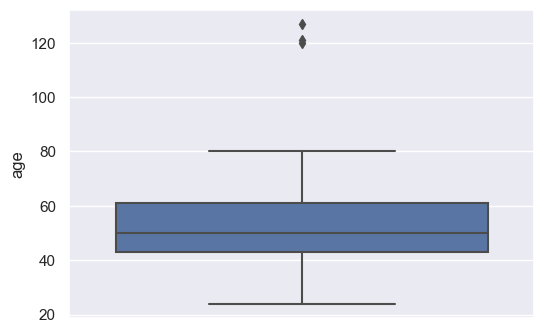

In [29]:
sns.boxplot(y=market["age"])

In [30]:
market.sort_values(by="age",ascending=False)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country,age
513,11004,1893,2n Cycle,Single,60182.0,0,1,5/17/14,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,SA,127
827,1150,1899,PhD,Together,83532.0,0,0,9/26/13,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,SP,121
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,9/26/13,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,0,1,IND,120
2171,6663,1940,PhD,Single,51141.0,0,0,7/8/13,96,144,0,7,0,0,6,1,3,1,4,5,0,0,0,0,0,0,0,SP,80
1740,6932,1941,PhD,Married,93027.0,0,0,4/13/13,77,1285,42,716,55,0,21,0,7,10,5,2,0,0,1,0,0,0,0,SP,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,5184,1995,Graduation,Single,34824.0,0,0,3/26/14,65,4,2,11,2,0,4,1,1,0,2,6,0,0,0,0,0,0,0,SP,25
1298,4427,1995,2n Cycle,Single,83257.0,0,0,9/18/12,56,536,27,590,38,107,67,1,5,10,12,6,1,0,1,0,0,1,1,SP,25
697,10548,1995,Graduation,Single,71163.0,0,0,3/9/14,30,283,17,372,138,106,44,1,3,8,12,1,0,0,0,0,0,0,0,GER,25
1824,193,1996,Basic,Married,14421.0,0,0,2/17/14,81,0,0,2,3,3,8,1,1,0,2,5,1,0,0,0,0,0,0,SP,24


let's cheq outliers are gone and we got a boxplot with no outliers

In [31]:
market=market[market['age']<100]

<AxesSubplot:ylabel='age'>

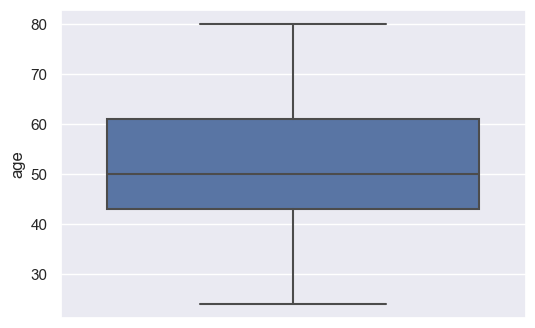

In [32]:
sns.boxplot(y=market['age'])

In [33]:
market.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country,age
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,50
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,59
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,62
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,53
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,31


here I see that the income of cutomers are very affected with there education

<AxesSubplot:xlabel='education', ylabel='income'>

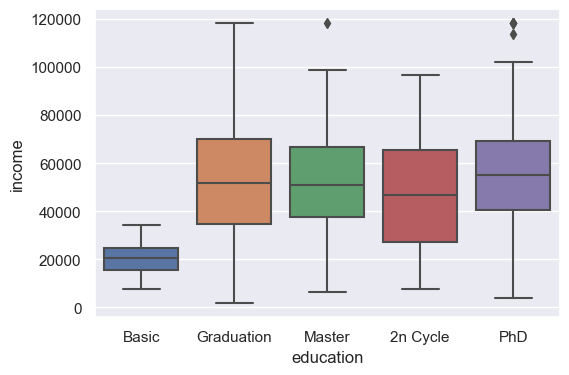

In [34]:
sns.boxplot(x="education",y="income",data=market,order=["Basic","Graduation","Master","2n Cycle","PhD"])

its very important plot because I see that 40 to 60 age group are the highest numbers of customers and 20000 to 80000 income group pepole are very high compare to other customers 

fig=plt.figure(figsize=(20,15))
ax=fig.gca()
market.hist(ax=ax)
plt.tight_layout()
plt.show()

lets try to  find relationship in columns with each other 

In [35]:
market.corr(numeric_only=True).sort_values(by="income",ascending=False)

,id,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,age
income,0.001333,-0.206439,1.000000,-0.525448,0.037684,0.007729,0.709801,0.523149,0.694481,0.536364,0.540069,0.402516,-0.117270,0.479037,0.695929,0.656621,-0.654010,-0.013833,0.226662,0.406856,0.337049,0.107266,0.167827,-0.028006,0.206439
mntwines,-0.018906,-0.164615,0.709801,-0.497203,0.003945,0.015981,1.000000,0.385844,0.568081,0.396915,0.389583,0.391461,0.009117,0.553663,0.634237,0.640219,-0.321616,0.061360,0.373349,0.472889,0.351610,0.206309,0.246320,-0.036420,0.164615
numcatalogpurchases,-0.000404,-0.125856,0.695929,-0.504598,-0.112477,0.024197,0.634237,0.485611,0.733787,0.532241,0.494623,0.441656,-0.012015,0.386539,1.000000,0.517887,-0.522023,0.104301,0.140163,0.321522,0.309130,0.099931,0.219912,-0.018675,0.125856
mntmeatproducts,-0.003706,-0.033622,0.694481,-0.439031,-0.261134,0.022914,0.568081,0.546740,1.000000,0.572986,0.534624,0.357556,-0.121128,0.306841,0.733787,0.486349,-0.539194,0.018416,0.091677,0.375252,0.313379,0.043549,0.237966,-0.021017,0.033622
numstorepurchases,-0.011733,-0.138998,0.656621,-0.501863,0.049212,-0.000460,0.640219,0.459875,0.486349,0.457885,0.455150,0.390693,0.065635,0.515756,0.517887,1.000000,-0.433813,-0.069455,0.177705,0.214249,0.178462,0.085146,0.035563,-0.011947,0.138998
mntsweetproducts,-0.004381,-0.021516,0.540069,-0.377843,-0.163107,0.025244,0.389583,0.571474,0.534624,0.583484,1.000000,0.356754,-0.121395,0.333608,0.494623,0.455150,-0.422289,0.001660,0.029206,0.258417,0.245113,0.010142,0.116059,-0.020569,0.021516
mntfishproducts,-0.022405,-0.041154,0.536364,-0.388643,-0.205235,0.000788,0.396915,0.593038,0.572986,1.000000,0.583484,0.426299,-0.143147,0.299428,0.532241,0.457885,-0.446151,-0.000276,0.016058,0.194793,0.261712,0.002322,0.108135,-0.019098,0.041154
mntfruits,0.010008,-0.013447,0.523149,-0.373258,-0.175905,-0.005257,0.385844,1.000000,0.546740,0.593038,0.571474,0.393459,-0.134191,0.302301,0.485611,0.459875,-0.417741,0.014644,0.006598,0.208990,0.192417,-0.009924,0.123007,-0.002956,0.013447
numwebpurchases,-0.017232,-0.162265,0.479037,-0.372327,0.162239,-0.005680,0.553663,0.302301,0.306841,0.299428,0.333608,0.407873,0.241228,1.000000,0.386539,0.515756,-0.051589,0.042685,0.162722,0.141428,0.159100,0.034722,0.151084,-0.013524,0.162265
acceptedcmp5,-0.004441,0.019025,0.406856,-0.204582,-0.190119,0.000233,0.472889,0.208990,0.375252,0.194793,0.258417,0.176628,-0.183837,0.141428,0.321522,0.214249,-0.276097,0.080836,0.312597,1.000000,0.409420,0.222918,0.324891,-0.008378,-0.019025


create heatmap for better understanding of relationship of columns with each other and we see income columns are not very strong  but 50 % relationship with products 

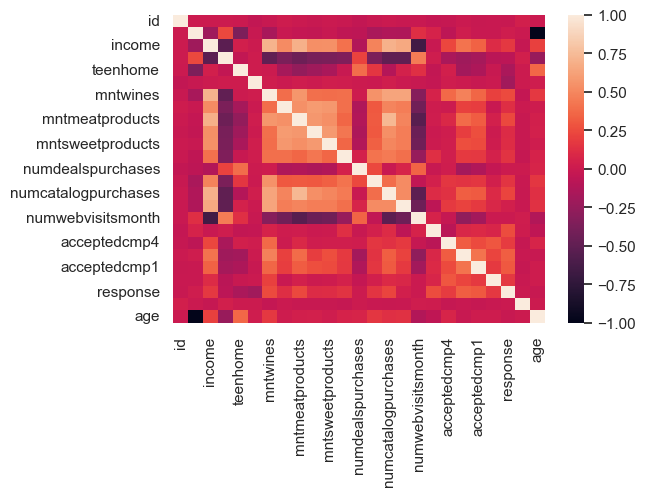

In [36]:
sns.heatmap(market.corr(numeric_only=True),annot=False)
plt.show()

now see in more depth of behaviour with every products purchase

In [37]:
num_purchase=['numdealspurchases','numwebpurchases','numcatalogpurchases','numstorepurchases']

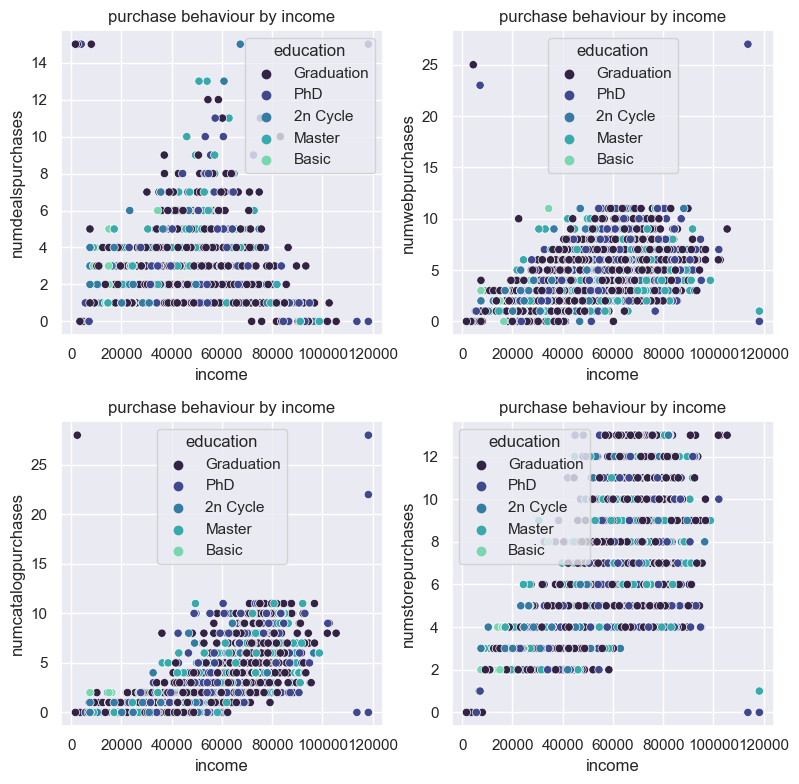

In [38]:
fig=plt.figure(figsize=(8,8))
plot=0
for i in range(len(num_purchase)):
    plot+=1
    ax=plt.subplot(2,2,plot)
    sns.scatterplot(x=market["income"],y=market[num_purchase[i]],hue=market["education"],palette="mako")
    plt.title("purchase behaviour by income")
plt.tight_layout()
plt.show()

here I see that store purchase and catalog purchase are strong Linear relationship with income

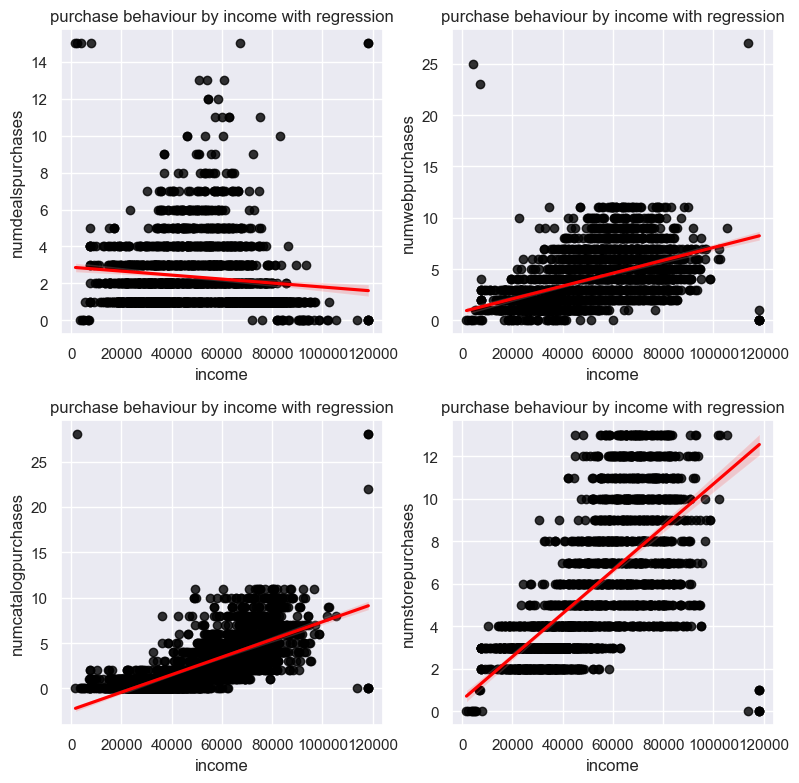

In [39]:
fig=plt.figure(figsize=(8,8))
plot=0
for i in range(len(num_purchase)):
    plot+=1
    ax=plt.subplot(2,2,plot)
    sns.regplot(x=market['income'],y=market[num_purchase[i]],scatter_kws={"color":"black"},line_kws={"color":"red"})
    plt.title("purchase behaviour by income with regression")
plt.tight_layout()
plt.show()

create one more columns whic contains total purchase of customer 

In [40]:
market["total_purchase"]=market['numdealspurchases']+market['numwebpurchases']+market['numcatalogpurchases']+market['numstorepurchases']

In [41]:
market.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country,age,total_purchase
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,50,15
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,59,18
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,62,11
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,53,4
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,31,8


here I see purchase of products are repditly  in upper trend with income whic means the cutomers who are high paid they purchase more products compare to low paid customers 

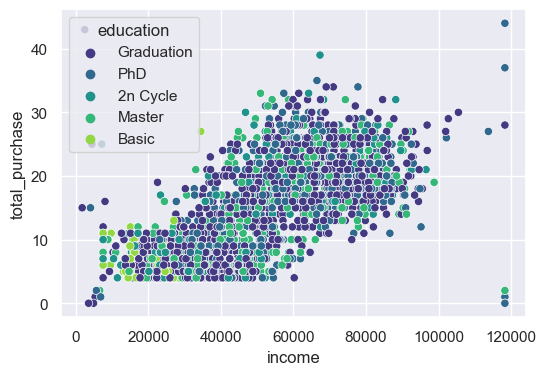

In [42]:
sns.scatterplot(x=market["income"],y=market["total_purchase"],palette="viridis",hue=market["education"])
plt.show()

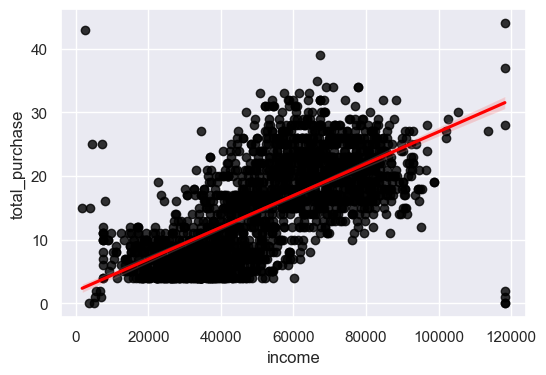

In [43]:
sns.regplot(x=market['income'],y=market["total_purchase"],scatter_kws={"color":"black"},line_kws={"color":"red"})
plt.show()

now do some analysis with products but I see there is no strong relations ship with income and products 

In [44]:
products=["mntwines","mntfruits","mntmeatproducts","mntfishproducts","mntsweetproducts","mntgoldprods"]

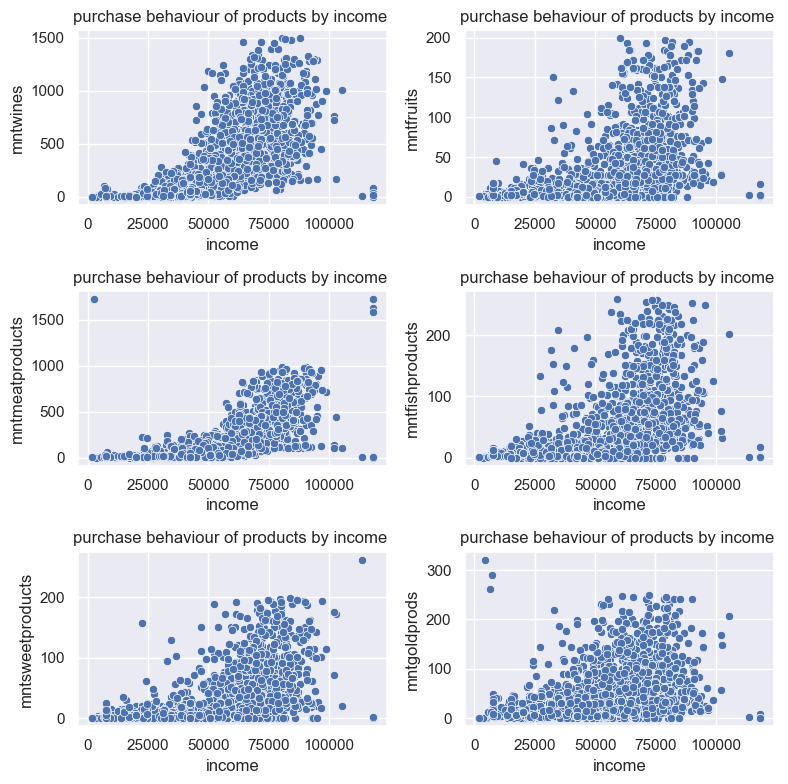

In [45]:
fig=plt.figure(figsize=(8,8))
plot=0
for i in range(len(products)):
    plot+=1
    ax=plt.subplot(3,2,plot)
    sns.scatterplot(x=market["income"],y=market[products[i]],palette="rocket")
    plt.title("purchase behaviour of products by income ")
plt.tight_layout()
plt.show()

because I don't understand in plot so now I try to cheq relations with their log

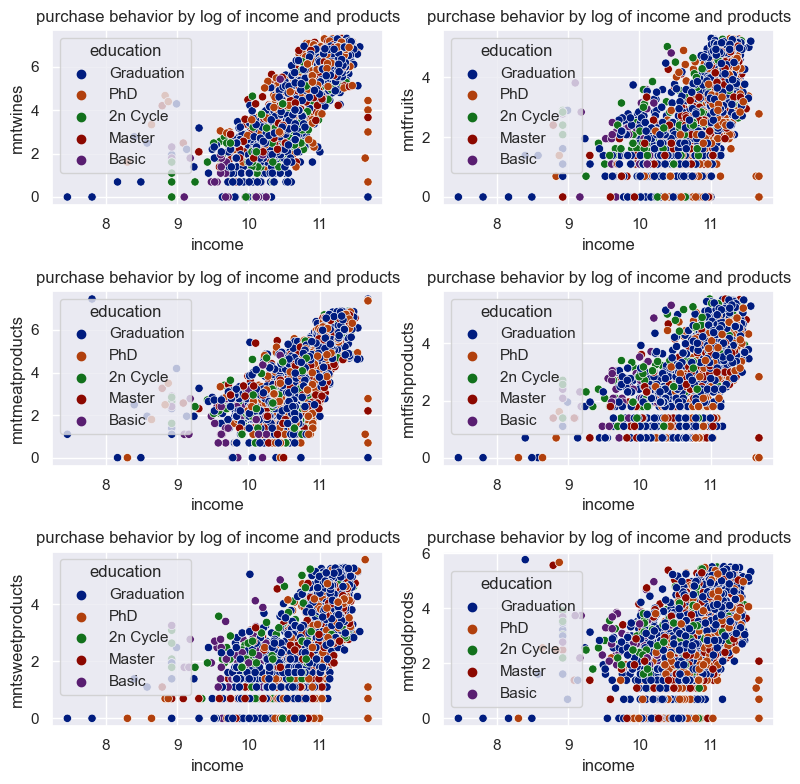

In [46]:
fig=plt.figure(figsize=(8,8))
plot=0
axes=[None for  columns in products]
for i in range(len(products)):
    plot+=1
    ax=plt.subplot(3,2,plot)
    sns.scatterplot(x=np.log(market['income']),y=np.log(market[products[i]]),palette="dark",hue=market["education"])
    plt.title("purchase behavior by log of income and products")
plt.tight_layout()
plt.show()

here i know the customers whic education  are basic their purchasing behaviour is very low   

In [47]:
pd.DataFrame.iteritems=pd.DataFrame.items

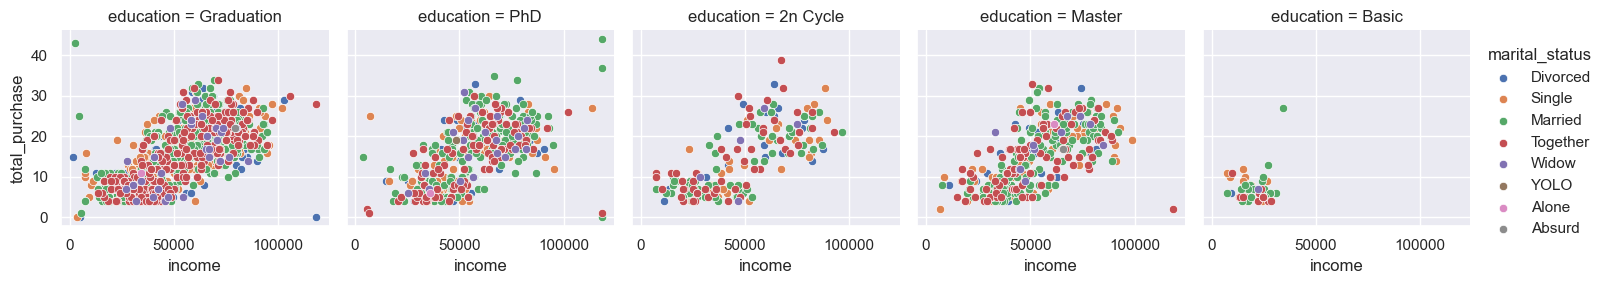

In [48]:
fg=sns.FacetGrid(market,col="education",hue="marital_status")
fg.map(sns.scatterplot , "income","total_purchase").add_legend()

<Figure size 1000x1000 with 0 Axes>

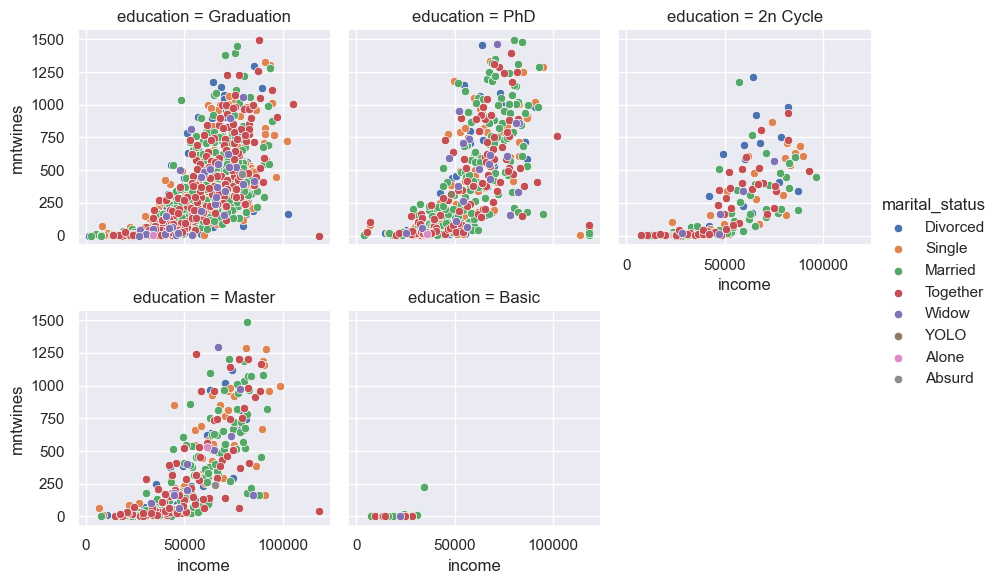

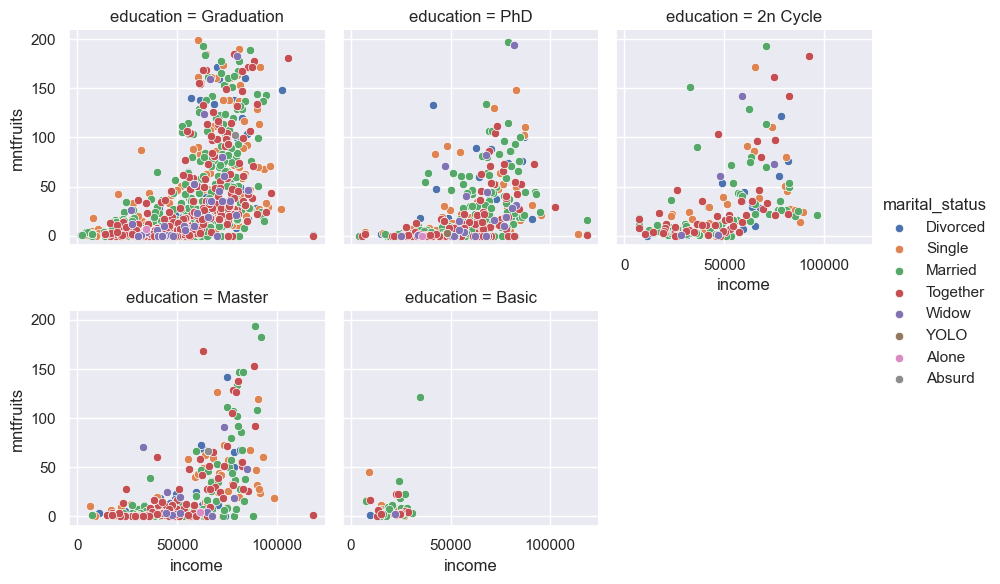

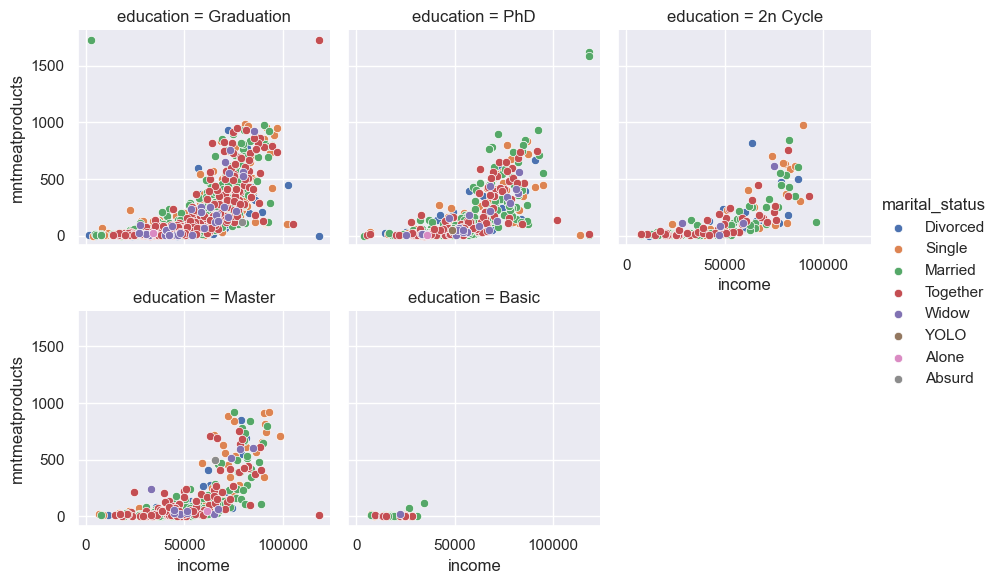

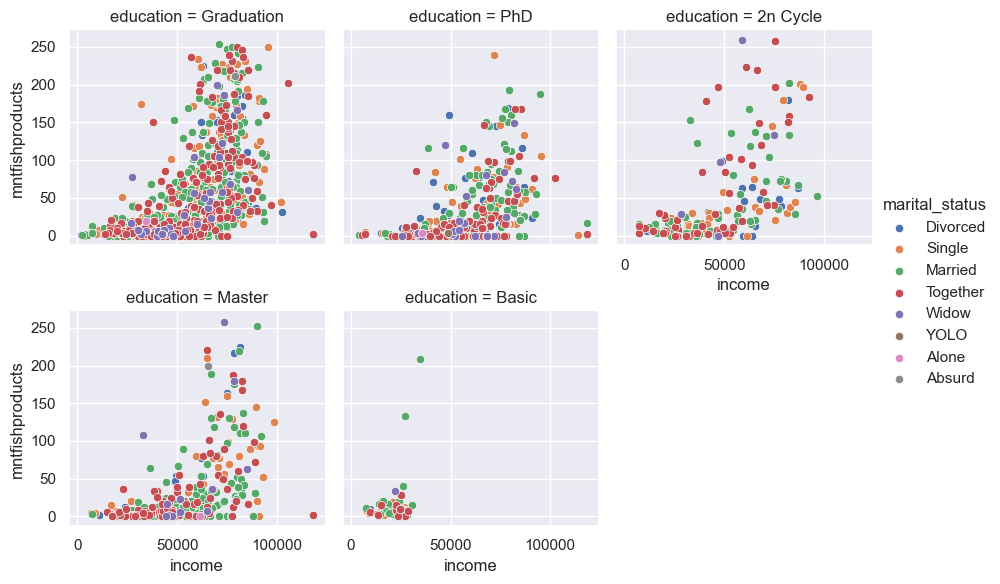

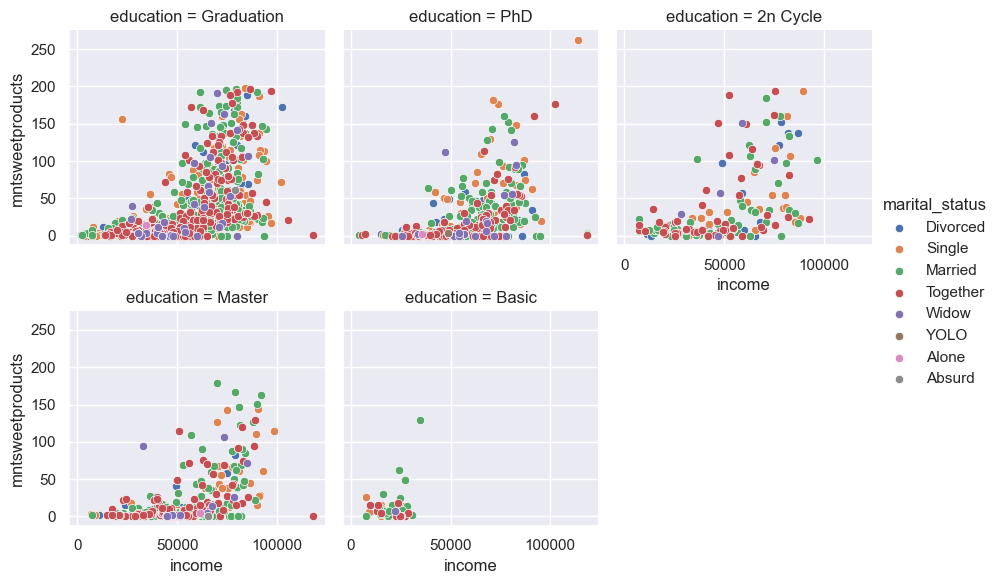

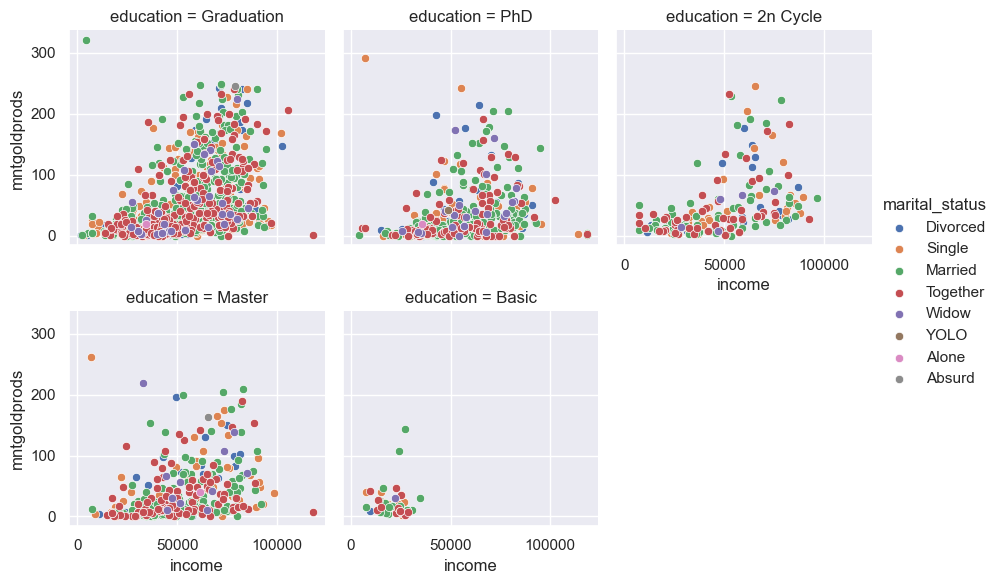

In [49]:
plt.figure(figsize=(10,10))
gg={}
for i in range(6):
    gg["g{0}".format(i)]=sns.FacetGrid(market,col="education",hue="marital_status",col_wrap=3)
    gg["g{0}".format(i)].map(sns.scatterplot,"income",products[i]).add_legend()

Now I used age column insted of income column 

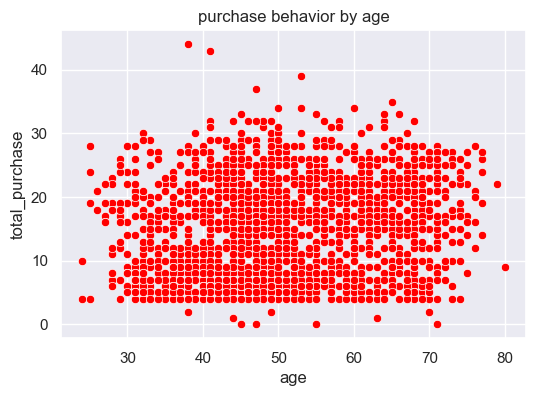

In [50]:
sns.scatterplot(x="age",y="total_purchase",data=market,color="red")
plt.title("purchase behavior by age")
plt.show()

its very defficult to say anything because their no differnce with every age pepole buy products 

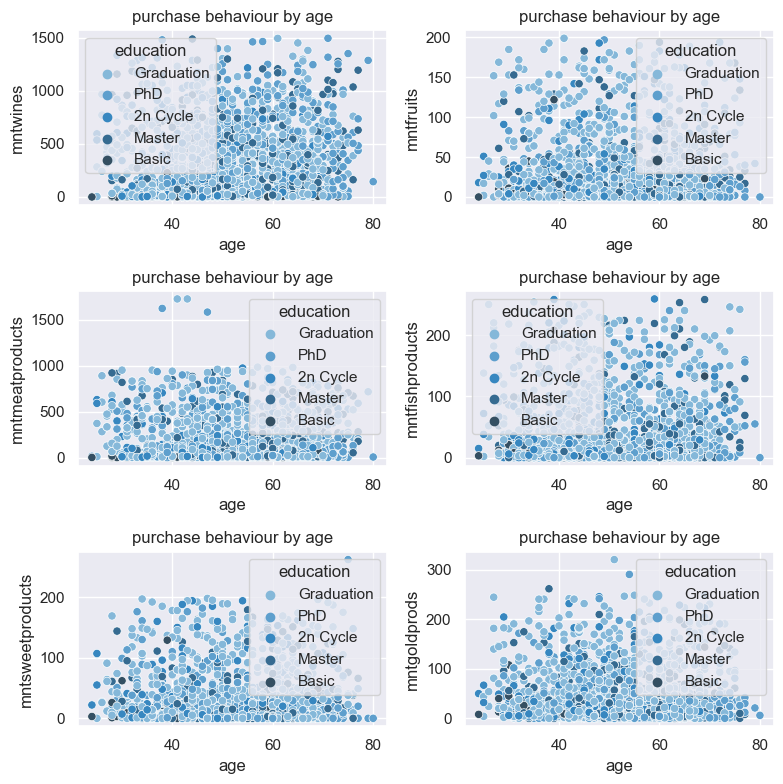

In [51]:
fig=plt.figure(figsize=(8,8))
plot=0
for i in range(len(products)):
    plot+=1
    ax=plt.subplot(3,2,plot)
    sns.scatterplot(x=market["age"],y=market[products[i]],hue=market.education,palette="Blues_d")
    plt.title("purchase behaviour by age")
plt.tight_layout()
plt.show()

now create a columns with customers age groups 18 to 35 , 36 to 50 , 51 to 70 and 71 to older

In [52]:
def age_group(age):
    if 18<=age<=35:
        return "18 to 35"
    elif 35< age <=50:
        return "36 to 50"
    elif 50<age<=70:
        return "51 to 70"
    else:
        return "71 to older"

In [53]:
age_group(36)

'36 to 50'

In [54]:
market['age_group']=market.age.apply(age_group)

In [55]:
market.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country,age,total_purchase,age_group
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,50,15,36 to 50
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,59,18,51 to 70
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,62,11,51 to 70
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,53,4,51 to 70
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,31,8,18 to 35


here I see that's 36 to 70 age group pepole are most numbers

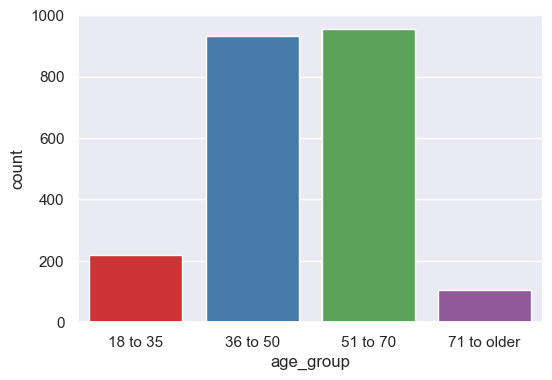

In [56]:
sns.countplot(x="age_group",data=market,palette="Set1",order=["18 to 35","36 to 50","51 to 70","71 to older"])
plt.show()

In [57]:
products

['mntwines',
 'mntfruits',
 'mntmeatproducts',
 'mntfishproducts',
 'mntsweetproducts',
 'mntgoldprods']

create one dataframe whic contains only 
 "age",
 'mntwines',
 'mntfruits',
 'mntmeatproducts',
 'mntfishproducts',
 'mntsweetproducts',
 'mntgoldprods'

In [58]:
age_plus=market.loc[:,("age",'mntwines',
 'mntfruits',
 'mntmeatproducts',
 'mntfishproducts',
 'mntsweetproducts',
 'mntgoldprods')]

In [59]:
pd.crosstab(market["marital_status"],market["education"])

education,2n Cycle,Basic,Graduation,Master,PhD
marital_status,,,,,
Absurd,0,0,1,1,0
Alone,0,0,1,1,1
Divorced,22,1,119,37,52
Married,80,20,429,138,190
Single,35,18,246,75,96
Together,56,14,284,102,115
Widow,5,1,35,11,24
YOLO,0,0,0,0,2


here I see graduate pepole are most of among rest they are more then one thousand 

<AxesSubplot:xlabel='education', ylabel='count'>

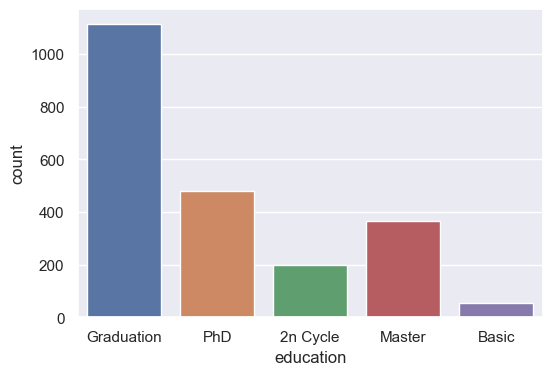

In [60]:
sns.countplot(market["education"])

In [61]:
market.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country,age,total_purchase,age_group
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,50,15,36 to 50
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,59,18,51 to 70
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,62,11,51 to 70
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,53,4,51 to 70
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,31,8,18 to 35


In [62]:
age_plus["age_group"]=pd.cut(age_plus.age,bins=[18,35,50,70,100],labels=["18 to 35","36 to 50","51 to 70","71 to older"])

In [73]:
market.age_group.value_counts()

age_group
51 to 70       955
36 to 50       932
18 to 35       219
71 to older    106
Name: count, dtype: int64

In [63]:
age_plus.age_group.value_counts()

age_group
51 to 70       955
36 to 50       932
18 to 35       219
71 to older    106
Name: count, dtype: int64

In [64]:
age_plus.head()

,age,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,age_group
0,50,189,104,379,111,189,218,36 to 50
1,59,464,5,64,7,0,37,51 to 70
2,62,134,11,59,15,2,30,51 to 70
3,53,10,0,1,0,0,0,51 to 70
4,31,6,16,24,11,0,34,18 to 35


here i see wines are the products whic sells are very high with every age group 

In [65]:
aa=age_plus.groupby("age_group").sum().reset_index()

<AxesSubplot:xlabel='age_group'>

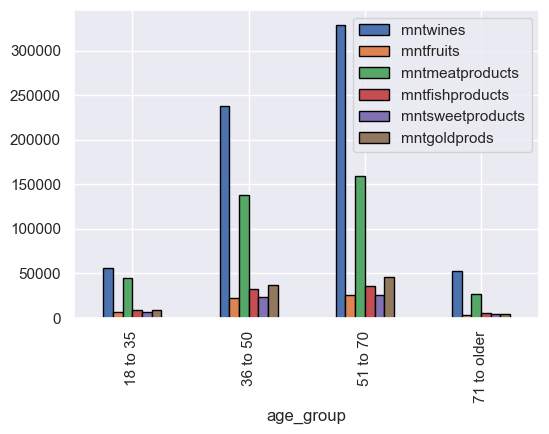

In [66]:
aa.plot(kind="bar",x="age_group",y=products,edgecolor="black")

In [67]:
num_purchase

['numdealspurchases',
 'numwebpurchases',
 'numcatalogpurchases',
 'numstorepurchases']

its very intersting plot here I see thats 35 to 70 pepole are love to purchase products when they got a deal , 
71 and plus age customers are love to purchase products in store and catalog also with web puchase 

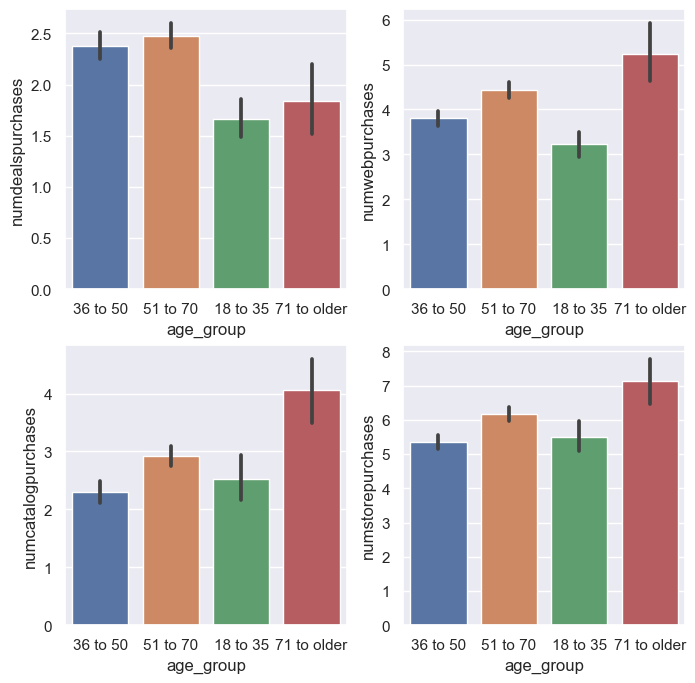

In [68]:
fig=plt.figure(figsize=(8,8))
plot=0
for i in range(len(num_purchase)):
    plot+=1
    ax=plt.subplot(2,2,plot)
    sns.barplot(x=market.age_group,y=market[num_purchase[i]])

In [69]:
market.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country,age,total_purchase,age_group
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,50,15,36 to 50
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,59,18,51 to 70
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,62,11,51 to 70
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,53,4,51 to 70
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,31,8,18 to 35


here we know singapore peploe are the very high numbers in front of other country's customers 

Text(0.5, 1.0, 'customer by country')

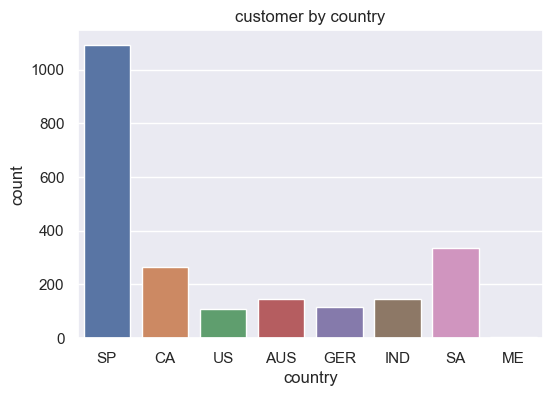

In [70]:
sns.countplot(market["country"])
plt.title("customer by country",)

<AxesSubplot:xlabel='country', ylabel='total_purchase'>

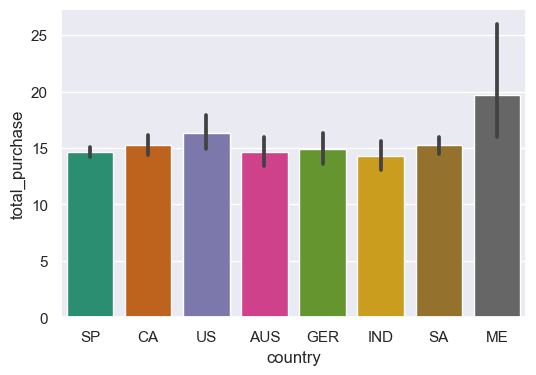

In [71]:
sns.barplot(x="country",y="total_purchase",data=market,palette="Dark2")

In [72]:
market.country.value_counts()

country
SP     1092
SA      335
CA      266
AUS     147
IND     146
GER     116
US      107
ME        3
Name: count, dtype: int64

now here I see Montenegro have least number of customers but their total purchase is highest  ,
it is very difficult to accept that only 3 pepole are buy products,
i don't know its mistake or not from your side 